## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# parameters
alpha = 0.4
beta = 0.98
rho = 0.9

# steady state
zbar = 0
Kbar = (alpha*beta)**(1/(1-alpha))

In [3]:
# Uhlig matrices
F = (beta*alpha*Kbar**(alpha-1))/(Kbar**alpha-Kbar)
G = -(beta*alpha*Kbar**(alpha-1)*(alpha+Kbar**(alpha-1)))/(Kbar**alpha-Kbar)
H = (beta*alpha**2*Kbar**(2*(alpha-1)))/(Kbar**alpha-Kbar)
L = -(beta*alpha*Kbar**alpha)/(Kbar**alpha-Kbar)
M = (beta*alpha*Kbar**(2*alpha-1))/(Kbar**alpha-Kbar)
N = rho

In [4]:
P1 = (-G+np.sqrt(G**2-4*F*H))/(2*F)
P2 = (-G-np.sqrt(G**2-4*F*H))/(2*F)
print(P1,P2)

2.5510204081632657 0.4


In [5]:
P = P2
Q = - (L*N+M)/(F*N+F*P+G)

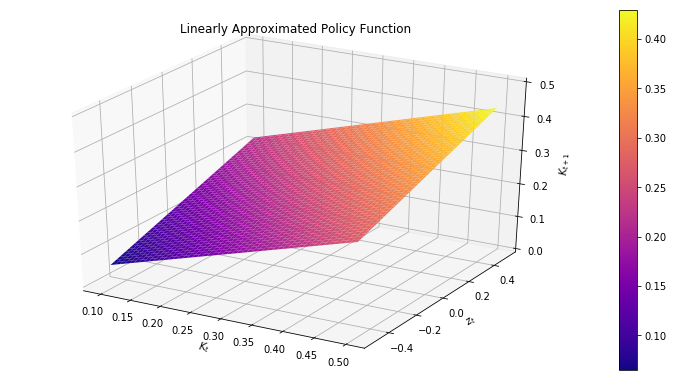

In [6]:
ngrid = 100
Kmax = 0.5
Kmin = 0.1
zmax = 0.5
zmin = -0.5
Kgrid = np.linspace(Kmin, Kmax, ngrid)
zgrid = np.linspace(zmin, zmax, ngrid)

Kp = np.zeros((ngrid,ngrid))
for i in range(ngrid):
    for j in range(ngrid):
        Kp[i,j] = P*(Kgrid[i]-Kbar) + Q*zgrid[j] + Kbar

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
KK, zz = np.meshgrid(Kgrid, zgrid)
surf = ax.plot_surface(KK,zz,Kp,cmap='plasma')
ax.set_title('Linearly Approximated Policy Function')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
ax.set_zlim(0,0.5)
fig.colorbar(surf)
plt.show()

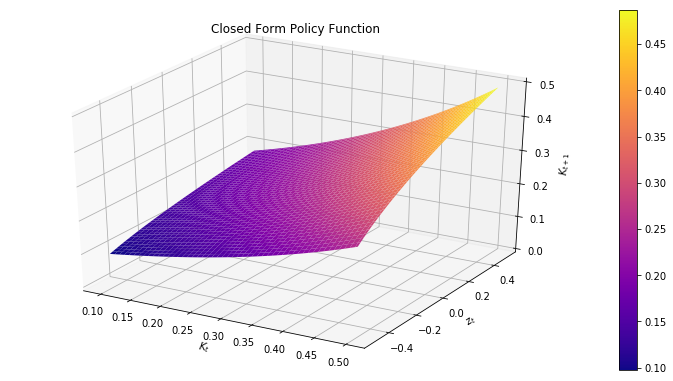

In [7]:
# analytical solution

Kpcf = np.zeros((ngrid,ngrid))
for i in range(ngrid):
    for j in range(ngrid):
        Kpcf[i,j] = alpha*beta*np.exp(zgrid[j])*Kgrid[i]**alpha

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
KK, zz = np.meshgrid(Kgrid, zgrid)
surf = ax.plot_surface(KK,zz,Kpcf,cmap='plasma')
ax.set_title('Closed Form Policy Function')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
ax.set_zlim(0,0.5)
fig.colorbar(surf)
plt.show()

## Exercise 2

In [8]:
# Uhlig matrices
F = (beta*alpha*Kbar**alpha)/((Kbar**alpha-Kbar))
G = -(beta*alpha*Kbar**alpha)*(alpha+Kbar**(alpha-1))/(Kbar**alpha-Kbar)
H = (beta*alpha**2*Kbar**(2*alpha-1))/(Kbar**alpha-Kbar)
L = -(beta*alpha*Kbar**alpha)/(Kbar**alpha-Kbar)
M = (beta*alpha*Kbar**(2*alpha-1))/(Kbar**alpha-Kbar)
N = rho

In [9]:
P1 = (-G+np.sqrt(G**2-4*F*H))/(2*F)
P2 = (-G-np.sqrt(G**2-4*F*H))/(2*F)
print(P1,P2)

2.5510204081632657 0.3999999999999999


In [10]:
P = P2
Q = - (L*N+M)/(F*N+F*P+G)

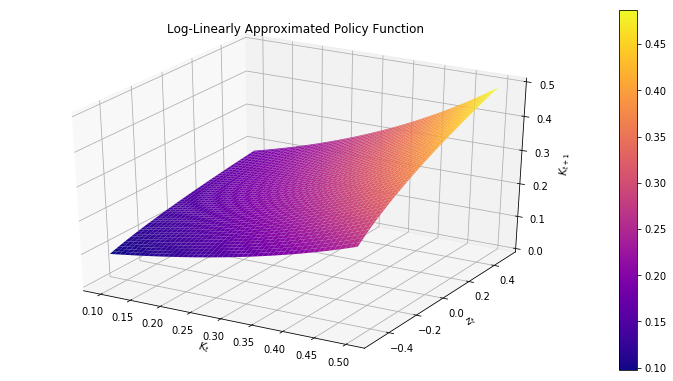

In [11]:
Kp = np.zeros((ngrid,ngrid))
for i in range(ngrid):
    for j in range(ngrid):
        Kp[i,j] = np.exp(P*(np.log(Kgrid[i])-np.log(Kbar)) + Q*zgrid[j] + np.log(Kbar))

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
KK, zz = np.meshgrid(Kgrid, zgrid)
surf = ax.plot_surface(KK,zz,Kp,cmap='plasma')
ax.set_title('Log-Linearly Approximated Policy Function')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
ax.set_zlim(0,0.5)
fig.colorbar(surf)
plt.show()

## Exercise 4

In [12]:
# parameters
gamma = 2.5
xi = 1.5
beta = .98
alpha = .40
a = .5
delta = .10
zbar = 0
rho = .9
tau = .05

params = gamma,xi,beta,alpha,a,delta,zbar,rho,tau

In [13]:
def defeqn4(Xp,X,Y,Z,params):
    kp = Xp
    k = X
    l = Y
    z = Z
    
    gamma,xi,beta,alpha,a,delta,zbar,rho,tau = params
    
    r = alpha*k**(alpha-1)*l**(1-alpha)*np.exp(z*(1-alpha))
    w = (1-alpha)*k**alpha*l**(-alpha)*np.exp(z*(1-alpha))
    T = tau*(w*l+(r-delta)*k)
    c = (1-tau)*(w*l+(r-delta)*k)+k+T-kp
    y = k**alpha*(l*np.exp(z))**(1-alpha)
    i = kp - (1-delta)*k

    return r,w,T,c,y,i

In [14]:
def eulereqn4(theta,params):
    (Xpp,Xp,X,Yp,Y,Zp,Z) = theta
    gamma,xi,beta,alpha,a,delta,zbar,rho,tau = params
    
    r,w,T,c,y,i = defeqn4(Xp,X,Y,Z,params)
    rp,wp,Tp,cp,yp,ip = defeqn4(Xpp,Xp,Yp,Zp,params)
    l = Y
    
    euler1 = c**(-gamma)-beta*cp**(-gamma)*((rp-delta)*(1-tau)+1)
    euler2 = a*(1-l)**(-xi) - c**(-gamma)*w*(1-tau)
    
    return euler1,euler2

In [15]:
# LinApp
nx = 1
ny = 1
nz = 1
logX = 0
Slyv = 0

from LinApp_FindSS import LinApp_FindSS

In [16]:
# Steady state
Zbar = np.array([zbar])
guessXY = (5,.3)
(kbar, lbar) = LinApp_FindSS(eulereqn4, params, guessXY, Zbar, nx, ny)

rbar,wbar,Tbar,cbar,ybar,ibar = defeqn4(kbar, kbar, lbar, 0, params)
print('kbar: ', kbar)
print('cbar: ', cbar)
print('rbar: ', rbar)
print('wbar: ', wbar)
print('lbar: ', lbar)
print('Tbar: ', Tbar)
print('ybar: ', ybar)
print('ibar: ', ibar)

kbar:  4.225229026787066
cbar:  0.8607032061543958
rbar:  0.12148227712133172
wbar:  1.3279527683516201
lbar:  0.5797914531671019
Tbar:  0.04303516030771981
ybar:  1.2832261088331027
ibar:  0.4225229026787063


## Exercise 5

In [17]:
import copy
import pandas as pd

In [18]:
d = 10 ** (-6)
para0 = np.array(params)
ylabel = ('kbar', 'lbar', 'cbar', 'rbar', 'wbar', 'Tbar', 'ybar', 'ibar')
xlabel = ('gamma', 'xi', 'beta', 'alpha', 'a', 'delta', 'zbar', 'rho', 'tau')
der_mat = np.zeros((8,9))

In [19]:
for i in range(8):
    for j in range(9):
        paraR = copy.deepcopy(para0)
        paraL = copy.deepcopy(para0)
        paraR[j] = para0[j] + d
        paraL[j] = para0[j] - d
        
        if j == 6:
            zbar = para0[j] + d
        solR1 = LinApp_FindSS(eulereqn4, paraR, guessXY, np.array([zbar]), nx, ny)
        solR2 = defeqn4(solR1[0], solR1[0], solR1[1], 0, paraR)
        solR = np.append(solR1,solR2)
        if j == 6:
            zbar = para0[j] - d
        solL1 = LinApp_FindSS(eulereqn4, paraL, guessXY, np.array([zbar]), nx, ny)
        solL2 = defeqn4(solL1[0], solL1[0], solL1[1], 0, paraL)
        solL = np.append(solL1,solL2)
        der_mat[i,j] = (solR[i] - solL[i])/(2*d)

In [20]:
display = pd.DataFrame(data = der_mat, index=ylabel, columns=xlabel)
print(display.round(decimals=4))

       gamma      xi     beta    alpha       a    delta    zbar  rho     tau
kbar  0.1387 -0.8017  65.4304  25.9849 -1.8493 -48.3498  2.8383  0.0 -2.3232
lbar  0.0190 -0.1100   0.2602  -0.7694 -0.2538   1.3198 -0.1903  0.0 -0.1389
cbar  0.0000  0.0000  -1.0960  -0.0000  0.0000   1.0000 -0.0729  0.0  0.0226
rbar -0.0000 -0.0000   7.9873   4.3959 -0.0000  -7.2875  0.5312  0.0 -0.1648
wbar  0.0014 -0.0082   0.0876   0.1043 -0.0188  -0.1756 -0.0096  0.0  0.8490
Tbar  0.0283 -0.1633   1.7511   2.0852 -0.3767  -3.5113 -0.1918  0.0 -0.2344
ybar  0.0421 -0.2435   8.2941   4.6837 -0.5616  -4.1211  0.0921  0.0 -0.4667
ibar  0.0139 -0.0802   6.5430   2.5985 -0.1849  -0.6098  0.2838  0.0 -0.2323


## Exercise 6

In [21]:
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

In [22]:
def eulereqn6(theta,params):
    (kpp,lp,kp,l,k,lm,zp,z) = theta
    gamma,xi,beta,alpha,a,delta,zbar,rho,tau = params

    r,w,T,c,y,i = defeqn4(kp,k,l,z,params)
    rp,wp,Tp,cp,yp,ip = defeqn4(kpp,kp,lp,zp,params)
    
    euler1 = c**(-gamma)-beta*cp**(-gamma)*((rp-delta)*(1-tau)+1)
    euler2 = a*(1-l)**(-xi) - c**(-gamma)*w*(1-tau)
    
    return np.array([euler1,euler2])

In [23]:
nx = 2
ny = 0
nz = 1
logX = 1
Sylv = 0

theta0 = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0., 0.])

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(eulereqn6, params, theta0, nx, ny, nz, logX)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,rho,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[-17.85678587   3.15518743]
 [  0.           0.        ]]
GG:  [[ 36.19591326  -3.25392452]
 [-22.52731982   8.63824988]]
HH:  [[-18.2403903    0.        ]
 [ 22.27702702   0.        ]]
LL:  [[3.15518743]
 [0.        ]]
MM:  [[-3.25392451]
 [ 3.00365877]]
PP: [[ 0.9152937   0.        ]
 [-0.19192697  0.        ]]
QQ [[ 0.1289971 ]
 [-0.01131015]]


## Exercise 7

In [24]:
from numpy import random
from LinApp_SSL import LinApp_SSL

In [25]:
# simulation
nsim = 10000
nperiod = 250
sigmaz = 0.02

Xbar = np.array([[kbar],[lbar]])

# pre-allocate variables
maty = np.zeros((nsim,nperiod))
matc = np.zeros((nsim,nperiod))
mati = np.zeros((nsim,nperiod))
matl = np.zeros((nsim,nperiod))
matk = np.zeros((nsim,nperiod))
matkp = np.zeros((nsim,nperiod))
matw = np.zeros((nsim,nperiod))
matr = np.zeros((nsim,nperiod))
matz = np.zeros((nsim,nperiod))


for i in range(nsim):
    # for each simulation, reset Xtilde and ztilde to 0s
    ztilde = np.zeros(nperiod+1)
    Xtilde = np.zeros((2,nperiod+1))
    
    # generate TFP shocks
    epsilon = random.normal(loc=0, scale=sigmaz,size=nperiod)
    
    for t in range(1,nperiod+1):
        # from TFP shocks to ztilde
        ztilde[t] = rho * ztilde[t-1] + epsilon[t-1]
        Xtilde[:,t] = (np.dot(PP,np.array([Xtilde[:,t-1]]).T) + QQ*ztilde[t]).T
    
    z = zbar + ztilde 
    X = Xbar * np.exp(Xtilde)

    matk[i,:] = X[0,:-1]
    matkp[i,:] = X[0,1:]
    matl[i,:] = X[1,1:]
    matz[i,:] = z[:-1]
    maty[i,:] = matk[i,:]**alpha * (np.exp(matz[i,:])*matl[i,:])**(1-alpha)
    mati[i,:] = matkp[i,:] - (1-delta)*matk[i,:]
    matr[i,:] = alpha*((matl[i,:]*np.exp(matz[i,:])/matk[i,:])**(1-alpha))
    matw[i,:] = (1-alpha)*np.exp(matz[i,:]) * ((matk[i,:]/(matl[i,:] * np.exp(matz[i,:])))**alpha)
    matc[i,:] = (matw[i,:]*matl[i,:] + (matr[i,:]-delta)*matk[i,:])+matk[i,:]-matkp[i,:]

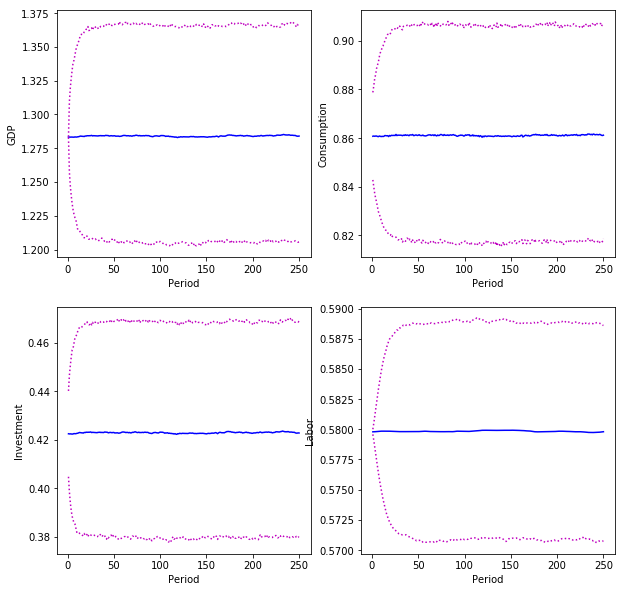

In [26]:
def plotpath(title, seq, pos):
    x = np.arange(1, 251, 1)
    q95 = np.percentile(seq, 95, axis=0)
    q5 = np.percentile(seq, 5, axis=0)
    ave = np.mean(seq, axis=0)
    pos.plot(x, ave, 'b-')
    pos.plot(x, q95, 'm:')
    pos.plot(x, q5, 'm:')
    pos.set_xlabel('Period')
    pos.set_ylabel(title)

fig, ([pos1, pos2], [pos3, pos4]) = plt.subplots(2,2,figsize = (10,10))
plotpath('GDP', maty, pos1)
plotpath('Consumption', matc, pos2)
plotpath('Investment', mati, pos3)
plotpath('Labor', matl, pos4)

## Exercise 8

In [27]:
import pandas as pd
import scipy.stats as stats

In [28]:
# auto-correlation
def autocorr(x, t = 1):
    autocorr = np.corrcoef(np.array([x[0:len(x)-t],x[t:len(x)]]))
    return autocorr

In [29]:
labels = np.array(['GDP', 'Consumption', 'Investment', 'Labor'])
variables = [maty, matc, mati, matl]

# pre-allocate variables
mean = np.zeros((4,nsim))
volat = np.zeros((4,nsim))
coefvar = np.zeros((4,nsim))
relvol = np.zeros((4,nsim))
autocorr = np.zeros((4,nsim))
cyclic = np.zeros((4,nsim))

for ind,seq in enumerate(variables):
    mean[ind,:] = np.mean(seq)
    volat[ind,:] = np.std(seq)
    coefvar[ind,:] = mean[ind,:] / volat[ind,:]
    relvol[ind,:] = volat[ind,:] / volat[0,:]
    
    for isim in range(nsim):
        autocorr[ind,isim] = pd.Series(seq[isim,:]).autocorr(1)
        cyclic[ind,isim] = stats.pearsonr(seq[isim,:],maty[isim,:])[0]

In [30]:
for ind, var in enumerate(labels):
    print(var)
    print('mean = ', np.mean(mean[ind, :]).round(4), '\n(se = ', stats.sem(mean[ind, :]).round(4),')')
    print('volatility =  ', np.mean(volat[ind, :]).round(4), '\n(se = ', stats.sem(volat[ind, :]).round(4),')')
    print('coefficient of variation = ', np.mean(coefvar[ind, :]).round(4), '\n(se = ', stats.sem(coefvar[ind, :]).round(4),')')
    print('relative volatility = ', np.mean(relvol[ind, :]).round(4), '\n(se = ', stats.sem(relvol[ind, :]).round(4),')')
    print('persistence = ', np.mean(autocorr[ind, :]).round(4), '\n(se = ', stats.sem(autocorr[ind, :]).round(4),')')
    print('cyclicality = ', np.mean(cyclic[ind, :]).round(4), '\n(se = ', stats.sem(cyclic[ind, :]).round(4),')')
    print('\n')

GDP
mean =  1.284 
(se =  0.0 )
volatility =   0.048 
(se =  0.0 )
coefficient of variation =  26.7389 
(se =  0.0 )
relative volatility =  1.0 
(se =  0.0 )
persistence =  0.9251 
(se =  0.0003 )
cyclicality =  1.0 
(se =  0.0 )


Consumption
mean =  0.8611 
(se =  0.0 )
volatility =   0.0266 
(se =  0.0 )
coefficient of variation =  32.3765 
(se =  0.0 )
relative volatility =  0.5538 
(se =  0.0 )
persistence =  0.6474 
(se =  0.0009 )
cyclicality =  0.88 
(se =  0.0003 )


Investment
mean =  0.4229 
(se =  0.0 )
volatility =   0.0268 
(se =  0.0 )
coefficient of variation =  15.7686 
(se =  0.0 )
relative volatility =  0.5585 
(se =  0.0 )
persistence =  0.8976 
(se =  0.0003 )
cyclicality =  0.8815 
(se =  0.0003 )


Labor
mean =  0.5798 
(se =  0.0 )
volatility =   0.0053 
(se =  0.0 )
coefficient of variation =  109.5485 
(se =  0.0 )
relative volatility =  0.1102 
(se =  0.0 )
persistence =  0.9939 
(se =  0.0 )
cyclicality =  -0.8529 
(se =  0.0004 )




## Exercise 9

In [31]:
lag = 40

epsilon = np.zeros(lag+1)
epsilon[0] = sigmaz

for t in range(1, lag+1):
    ztilde[t] = rho * ztilde[t-1] + epsilon[t-1]
    Xtilde[:,t] = (np.dot(PP,np.array([Xtilde[:,t-1]]).T) + QQ*ztilde[t]).T
    
    Z = zbar + ztilde 
    X = Xbar * np.exp(Xtilde)
    
    k = X[0,:-1]
    kp = X[0,1:]
    l = X[1,1:]
    z = Z[:-1]
    
    y = (k**alpha)*(((np.exp(z)*l)**(1-alpha)))
    i = kp - (1-delta)*k
    w = (1-alpha)*np.exp(z)*((k/(l*np.exp(z)))** alpha)
    r = alpha*((l * np.exp(z)/k)**(1-alpha))
    c = (w*l + (r-delta)*k) + k - kp

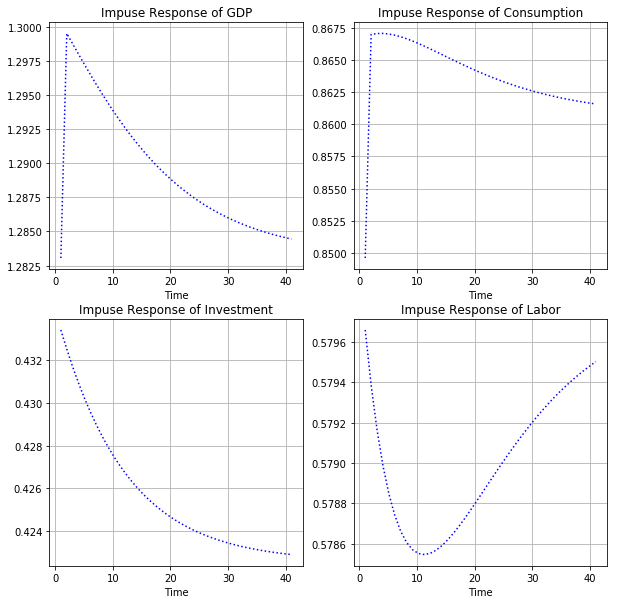

In [32]:
variables = [y,c,i,l]

fig,axs = plt.subplots(2,2,figsize = (10,10))
axs = axs.ravel()

for ind, s in enumerate(variables):
    period = np.linspace(1, lag + 1, lag)
    axs[ind].plot(period, s[:lag], 'b:')
    axs[ind].set_xlabel('Time')
    axs[ind].set_title('Impuse Response of %s' %labels[ind])
    axs[ind].grid()